# DNN (4주차)

SEOYEON CHOI  
2022-09-29

기계학습 특강 (4주차) 9월28일 \[회귀분석(2)–step1~4, step1의 다른표현,
step4의 다른표현, 로지스틱 intro\]

## imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import torch

## numpy, torch (선택학습)

### numpy, torch는 엄청 비슷해요

`-` torch.tensor() = np.array() 처럼 생각해도 무방

In [6]:
np.array([1,2,3]), torch.tensor([1,2,3])

(array([1, 2, 3]), tensor([1, 2, 3]))

`-` 소수점의 정밀도에서 차이가 있음 (torch가 좀 더 쪼잔함)

In [7]:
np.array([3.123456789])

array([3.12345679])

In [8]:
torch.tensor([3.123456789])

tensor([3.1235])

(서연필기)tensor는 gpu에 저장하기 때문에 메모리 아끼기 위해 정밀도가
낮은 경향이 있다.

`-` 기본적인 numpy 문법은 np 대신에 torch를 써도 무방 // 완전 같지는
않음

In [9]:
np.arange(10), torch.arange(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [10]:
np.linspace(0,1,10), torch.linspace(0,1,10)

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
         1.0000]))

In [11]:
np.random.randn(10)

array([-0.90388568,  0.51779102,  0.73699131, -0.88030899,  1.71668715,
       -0.70735651, -0.29752154,  1.10432159,  0.23592126,  0.91669421])

In [12]:
torch.randn(10)

tensor([ 0.6896,  1.8534, -0.3807,  1.3676,  0.0515,  0.4350,  0.6051, -1.5075,
         0.1474,  0.3098])

### length $n$ vector, $n \times 1$ col-vector, $1 \times n$ row-vector

브로드캐스팅 길이가 3인 벡터와 1인벡터를 더하면 오류 뜨지 않고 더해줌

`-` 길이가 3인 벡터 선언방법

In [13]:
a = torch.tensor([1,2,3])
a.shape

torch.Size([3])

`-` 3x1 col-vec 선언방법

(방법1)

In [14]:
a = torch.tensor([[1],[2],[3]])
a.shape

torch.Size([3, 1])

(방법2)

In [15]:
a = torch.tensor([1,2,3]).reshape(3,1)
a.shape

torch.Size([3, 1])

`-` 1x3 row-vec 선언방법

(방법1)

In [16]:
a = torch.tensor([[1,2,3]])
a.shape

torch.Size([1, 3])

(방법2)

In [17]:
a = torch.tensor([1,2,3]).reshape(1,3)
a.shape

torch.Size([1, 3])

`-` 3x1 col-vec 선언방법, 1x3 row-vec 선언방법에서 `[[1],[2],[3]]` 혹은
`[[1,2,3]]` 와 같은 표현이 이해안되면 아래링크로 가셔서

https://guebin.github.io/STBDA2022/2022/03/14/(2주차)-3월14일.html

첫번째 동영상 12:15 - 22:45 에 해당하는 분량을 학습하시길 바랍니다.

### torch의 dtype

`-` 기본적으로 torch는 소수점으로 저장되면 dtype=torch.float32 가 된다.
(이걸로 맞추는게 편리함)

In [18]:
tsr = torch.tensor([1.23,2.34])
tsr

tensor([1.2300, 2.3400])

In [19]:
tsr.dtype

torch.float32

`-` 정수로 선언하더라도 dtype를 torch.float32로 바꾸는게 유리함

(안 좋은 선언예시)

In [20]:
tsr = torch.tensor([1,2])
tsr 

tensor([1, 2])

In [21]:
tsr.dtype

torch.int64

(좋은 선언예시1)

In [22]:
tsr = torch.tensor([1,2],dtype=torch.float32)
tsr 

tensor([1., 2.])

In [23]:
tsr.dtype

torch.float32

(좋은 선언예시2)

In [24]:
tsr = torch.tensor([1,2.0])
tsr 

tensor([1., 2.])

In [25]:
tsr.dtype

torch.float32

(사실 int로 선언해도 나중에 float으로 바꾸면 큰 문제없음)

In [26]:
tsr = torch.tensor([1,2]).float()
tsr

tensor([1., 2.])

In [27]:
tsr.dtype

torch.float32

`-` 왜 정수만으로 torch.tensor를 만들때에도 torch.float32로 바꾸는게
유리할까? $\to$ torch.tensor끼리의 연산에서 문제가 될 수 있음

별 문제 없을수도 있지만

In [28]:
torch.tensor([1,2])-torch.tensor([1.0,2.0]) 

tensor([0., 0.])

아래와 같이 에러가 날수도 있다

(에러1)

In [29]:
torch.tensor([[1.0,0.0],[0.0,1.0]]) @ torch.tensor([[1],[2]]) 

(에러2)

In [30]:
torch.tensor([[1,0],[0,1]]) @ torch.tensor([[1.0],[2.0]])

(해결1) 둘다 정수로 통일

In [31]:
torch.tensor([[1,0],[0,1]]) @ torch.tensor([[1],[2]])

tensor([[1],
        [2]])

(해결2) 둘다 소수로 통일 \<– 더 좋은 방법임

In [32]:
torch.tensor([[1.0,0.0],[0.0,1.0]]) @ torch.tensor([[1.0],[2.0]])

tensor([[1.],
        [2.]])

### shape of vector

`-` 행렬곱셈에 대한 shape 조심

In [33]:
A = torch.tensor([[2.00,0.00],[0.00,3.00]]) 
b1 = torch.tensor([[-1.0,-5.0]])
b2 = torch.tensor([[-1.0],[-5.0]])
b3 = torch.tensor([-1.0,-5.0])

In [34]:
A.shape,b1.shape,b2.shape,b3.shape

(torch.Size([2, 2]), torch.Size([1, 2]), torch.Size([2, 1]), torch.Size([2]))

`-` A@b1: 계산불가, b1@A: 계산가능

In [35]:
A@b1

In [36]:
b1@A

tensor([[ -2., -15.]])

`-` A@b2: 계산가능, b2@A: 계산불가

In [37]:
A@b2

tensor([[ -2.],
        [-15.]])

In [38]:
b2@A

`-` A@b3: 계산가능, b3@A: 계산가능

In [39]:
(A@b3).shape ## b3를 마치 col-vec 처럼 해석

torch.Size([2])

In [40]:
(b3@A).shape ## b3를 마지 row-vec 처럼 해석

torch.Size([2])

-   뒤에 놓으면 b3를 컬럼벡터로 인식
-   앞에 놓으면 b3를 로우벡터로 인식

`-` 브로드캐스팅

In [41]:
a = torch.tensor([1,2,3])
a - 1

tensor([0, 1, 2])

In [42]:
b = torch.tensor([[1],[2],[3]])
b - 1

tensor([[0],
        [1],
        [2]])

계산이 되지 않아야 맞지 않나

In [43]:
a - b # a를 row-vec 로 해석

tensor([[ 0,  1,  2],
        [-1,  0,  1],
        [-2, -1,  0]])

잘못 계싼할 수 있으니 dimension 명시해주자

## Review: step1~4

In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-22-regression.csv") 
df

100 rows × 2 columns

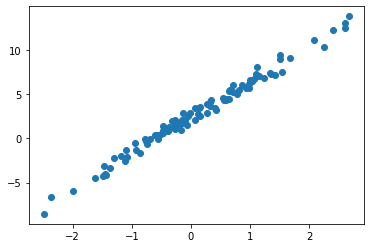

In [45]:
plt.plot(df.x, df.y,'o')

In [46]:
torch.tensor(df.x)

tensor([-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.66

(서연필기)

float64 숫자 정밀 저장

float32이면 `dtype=torch.float64)`꼬리표가 붙지 않음

``` python
_trt = torch.tensor(df.x).float()
_trt = torch.tensor(df.x,dtype=float30)
```

같은 역할, 메모리 적게 쓰기 위해 타입 바꿔주자

``` python
x= torch.tensor(df.x,dtype=torch.float32).reshape(100,1)
```

컬럼형식으로 받아주기 위해 변경

In [47]:
x= torch.tensor(df.x,dtype=torch.float32).reshape(100,1)
y= torch.tensor(df.y,dtype=torch.float32).reshape(100,1)
_1= torch.ones([100,1])
X = torch.concat([_1,x],axis=1)

``` pyhon
torch.ones([100,1])
torch.tensor([[1]*100,x]).T
```

같은 셋

In [48]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
What

tensor([[-5.],
        [10.]], requires_grad=True)

``` python
requires_grad=True 
```

reshape 미분 가능 옵션 주기 전에 shape 정해주자

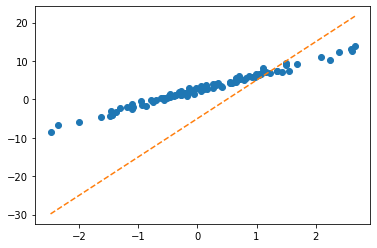

In [49]:
plt.plot(x,y,'o')
#plt.plot(x,-5+10*x,'--')
plt.plot(x,X@What.data,'--')

### ver1: loss = sum of squares error

In [50]:
alpha = 1/1000
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30): 
    # step1: yhat 
    yhat = X@What 
    # step2: loss 
    loss = torch.sum((y-yhat)**2)
    # step3: 미분 
    loss.backward()
    # step4: update 
    What.data = What.data - alpha * What.grad 
    What.grad = None # 

In [51]:
What

tensor([[2.4290],
        [4.0144]], requires_grad=True)

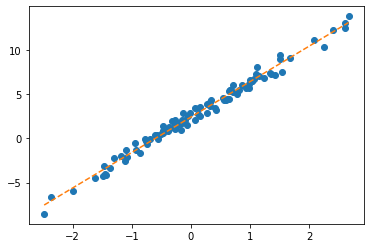

In [52]:
plt.plot(x,y,'o') 
plt.plot(x,X@What.data,'--')

-   note: 왜 What = What - alpha\*What.grad 는 안되는지?

In [53]:
What

tensor([[2.4290],
        [4.0144]], requires_grad=True)

In [54]:
What.data

tensor([[2.4290],
        [4.0144]])

What과 What.data는 달라요, requires_grad=True 미분 가능 꼬리표가 붙지
않기 때문!

### ver2: loss = mean squared error = MSE

In [55]:
alpha = 1/10
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30): 
    # step1: yhat 
    yhat = X@What 
    # step2: loss 
    loss = torch.mean((y-yhat)**2)
    # step3: 미분 
    loss.backward()
    # step4: update 
    What.data = What.data - alpha * What.grad 
    What.grad = None # 

In [56]:
What

tensor([[2.4290],
        [4.0144]], requires_grad=True)

(서연필기)mean 정의 - 데이터를 더 효율적으로 학습 가능, 데이터 수만큼 안
해도 돼, 계산 덜 해도 돼

## step1의 다른버전 – net 설계만

### ver1: net = torch.nn.Linear(1,1,bias=True)

In [57]:
torch.nn.Linear?

Init signature: 
torch . nn . Linear ( 
 in_features : int , 
 out_features : int , 
 bias : bool = True , 
 device = None , 
 dtype = None , 
 ) -> None 
 Docstring: 
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
This module supports :ref:`TensorFloat32<tf32_on_ampere>`.
Args:
 in_features: size of each input sample
 out_features: size of each output sample
 bias: If set to ``False``, the layer will not learn an additive bias.
 Default: ``True``
Shape:
 - Input: :math:`(*, H_{in})` where :math:`*` means any number of
 dimensions including none and :math:`H_{in} = \text{in\_features}`.
 - Output: :math:`(*, H_{out})` where all but the last dimension
 are the same shape as the input and :math:`H_{out} = \text{out\_features}`.
Attributes:
 weight: the learnable weights of the module of shape
 :math:`(\text{out\_features}, \text{in\_features})`. The values are
 initialized from :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})`, where
 :math:`k = \frac{1}{\text{in\_features}}`
 bias: the learnable bias of the module of shape :math:`(\text{out\_features})`.
 If :attr:`bias` is ``True``, the values are initialized from
 :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})` where
 :math:`k = \frac{1}{\text{in\_features}}`
Examples::
 >>> m = nn.Linear(20, 30)
 >>> input = torch.randn(128, 20)
 >>> output = m(input)
 >>> print(output.size())
 torch.Size([128, 30])
 Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/torch/nn/modules/linear.py
 Type: type
 Subclasses: NonDynamicallyQuantizableLinear, LazyLinear, Linear, Linear

input 잡는 법 - x의 컬럼 부분을 input이라고 생각하자

In [58]:
x.shape

torch.Size([100, 1])

output 잡는 법 - y의 컬럼 부분을 output이라고 생각하자

In [59]:
y.shape

torch.Size([100, 1])

In [60]:
_net =  torch.nn.Linear(in_features=1, out_features=1, bias=True) 

In [61]:
_net(x).shape

torch.Size([100, 1])

In [62]:
_net.bias # w0

Parameter containing:
tensor([-0.1281], requires_grad=True)

In [63]:
_net.weight # w1

Parameter containing:
tensor([[0.1433]], requires_grad=True)

In [64]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=1, out_features=1, bias=True) 

In [65]:
net.bias, net.weight

(Parameter containing:
 tensor([-0.8470], requires_grad=True),
 Parameter containing:
 tensor([[-0.3467]], requires_grad=True))

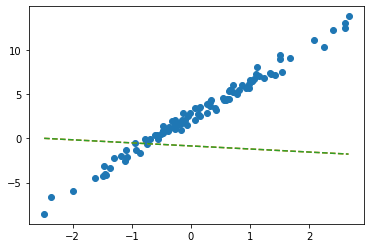

In [66]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')
w0hat = -0.847
w1hat = -0.3467
plt.plot(x,w0hat+w1hat*x,'--')

출력결과 같음을 확인

`-` net에서 $\hat{w}_0, \hat{w}_1$ 의 값은?

In [ ]:
net.weight # w1 

Parameter containing:
tensor([[-0.3467]], requires_grad=True)

In [ ]:
net.bias # w0 

Parameter containing:
tensor([-0.8470], requires_grad=True)

In [ ]:
_yhat = -0.8470 + -0.3467*x 

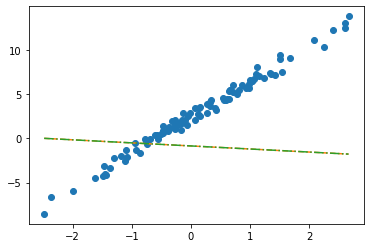

In [70]:
plt.plot(x,y,'o')
plt.plot(x, _yhat,'--')
plt.plot(x,net(x).data,'-.')

`-` 수식표현:
$\hat{y}_i = \hat{w}_0 + \hat{w}_1 x_i = \hat{b} + \hat{w}x_i = -0.8470 + -0.3467 x_i$
for all $i=1,2,\dots,100$.

### ver2: net = torch.nn.Linear(2,1,bias=False)

`-` 입력이 x가 아닌 X를 넣고 싶다면? (보통 잘 안하긴 해요, 왜?
bias=False로 주는게 귀찮거든요) - X는 바이어스가 고려된 상황

In [71]:
net(X) ## 그대로 쓰면 당연히 에러

In [72]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=2, out_features=1, bias=False) 

In [73]:
net(X).shape

torch.Size([100, 1])

In [74]:
net.weight

Parameter containing:
tensor([[-0.2451, -0.5989]], requires_grad=True)

위에 $w_0,w_1$ 순

In [75]:
net.bias

bias 없음을 확인

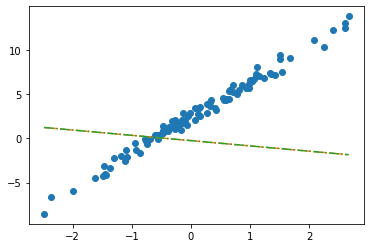

In [76]:
plt.plot(x,y,'o') 
plt.plot(x,net(X).data, '--')
plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]]), '-.')

`-` 수식표현:
$\hat{\bf y} = {\bf X} {\bf \hat W} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_{100} \end{bmatrix} \begin{bmatrix} -0.2451 \\ -0.5989 \end{bmatrix}$

### 잘못된사용1

In [77]:
_x = x.reshape(-1)

In [78]:
_x

tensor([-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.66

In [79]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=1,out_features=1) 

In [80]:
net(_x)

``` python
net(_x.reshape(100,1))
```

과 같이 정의

### 잘못된사용2

In [81]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=2,out_features=1) # bias=False를 깜빡..

In [82]:
net.weight

Parameter containing:
tensor([[-0.2451, -0.5989]], requires_grad=True)

In [83]:
net.bias

Parameter containing:
tensor([0.2549], requires_grad=True)

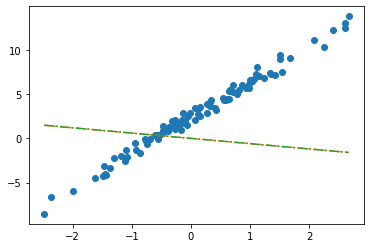

In [84]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')
plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]])+0.2549,'-.')

-   수식표현:
    $\hat{\bf y} = {\bf X} {\bf \hat W} + \hat{b}= \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_{100} \end{bmatrix} \begin{bmatrix} -0.2451 \\ -0.5989 \end{bmatrix} + 0.2549$

## step1의 다른버전 – 끝까지

### ver1: net = torch.nn.Linear(1,1,bias=True)

`-` 준비

In [85]:
net = torch.nn.Linear(1,1,bias=True)
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])
net.weight,net.bias

(Parameter containing:
 tensor([[10.]], requires_grad=True),
 Parameter containing:
 tensor([-5.], requires_grad=True))

`-` step1

In [86]:
yhat = net(x) 

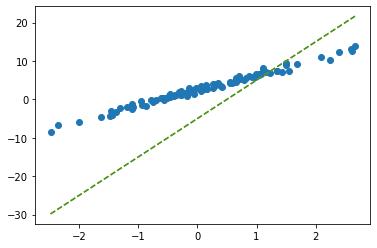

In [87]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')
plt.plot(x,-5+10*x,'--')

`-` step2

In [88]:
loss = torch.mean((y-yhat)**2)

`-` step3

(미분전)

In [89]:
net.bias,net.weight

(Parameter containing:
 tensor([-5.], requires_grad=True),
 Parameter containing:
 tensor([[10.]], requires_grad=True))

In [90]:
net.bias.grad, net.weight.grad

(None, None)

(미분)

In [91]:
loss.backward()

(미분후)

In [92]:
net.bias,net.weight

(Parameter containing:
 tensor([-5.], requires_grad=True),
 Parameter containing:
 tensor([[10.]], requires_grad=True))

In [93]:
net.bias.grad,net.weight.grad

(tensor([-13.4225]), tensor([[11.8893]]))

`-` step4

(업데이트전)

In [94]:
net.bias,net.weight

(Parameter containing:
 tensor([-5.], requires_grad=True),
 Parameter containing:
 tensor([[10.]], requires_grad=True))

In [95]:
net.bias.grad, net.weight.grad

(tensor([-13.4225]), tensor([[11.8893]]))

(업데이트)

In [96]:
net.bias.data = net.bias.data - 0.1*net.bias.grad 
net.weight.data = net.weight.data - 0.1*net.weight.grad 

In [97]:
net.bias.grad = None 
net.weight.grad = None 

(업데이트후)

In [98]:
net.bias,net.weight

(Parameter containing:
 tensor([-3.6577], requires_grad=True),
 Parameter containing:
 tensor([[8.8111]], requires_grad=True))

In [99]:
net.bias.grad, net.weight.grad

(None, None)

`-` 반복

In [100]:
net = torch.nn.Linear(1,1)
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])

In [101]:
for epoc in range(30):
    yhat = net(x) 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    net.weight.data = net.weight.data - 0.1*net.weight.grad
    net.bias.data = net.bias.data - 0.1*net.bias.grad
    net.weight.grad = None
    net.bias.grad = None

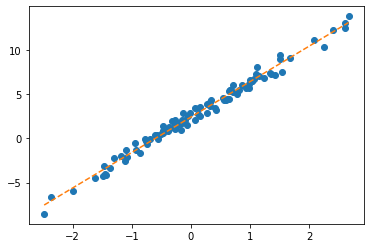

In [102]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

### ver2: net = torch.nn.Linear(2,1,bias=False)

`-` 준비

In [103]:
net = torch.nn.Linear(2,1,bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]])

`-` step1

In [104]:
yhat = net(X)

`-` step2

In [105]:
loss = torch.mean((y-yhat)**2)

`-` step3

(미분전)

In [106]:
net.weight

Parameter containing:
tensor([[-5., 10.]], requires_grad=True)

In [107]:
net.weight.grad

(미분)

In [108]:
loss.backward()

(미분후)

In [109]:
net.weight

Parameter containing:
tensor([[-5., 10.]], requires_grad=True)

In [110]:
net.weight.grad

tensor([[-13.4225,  11.8893]])

`-` step4

(업데이트전)

In [111]:
net.weight

Parameter containing:
tensor([[-5., 10.]], requires_grad=True)

In [112]:
net.weight.grad

tensor([[-13.4225,  11.8893]])

(업데이트)

In [113]:
net.weight.data = net.weight.data - 0.1*net.weight.grad

In [114]:
net.weight.grad = None

(업데이트후)

In [115]:
net.weight

Parameter containing:
tensor([[-3.6577,  8.8111]], requires_grad=True)

In [116]:
net.weight.grad

`-` 반복

In [117]:
net = torch.nn.Linear(2,1,bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]])

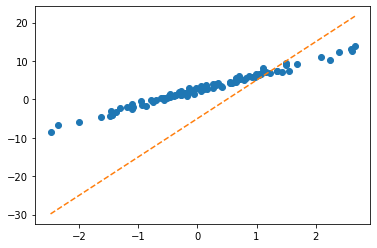

In [118]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

In [119]:
for epoc in range(30):
    yhat = net(X) 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    net.weight.data = net.weight.data - 0.1*net.weight.grad
    net.weight.grad = None

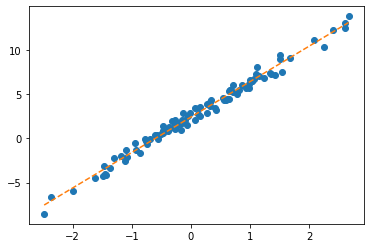

In [120]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

## step4의 다른버전: 옵티마이저!

### ver1: net = torch.nn.Linear(1,1,bias=True)

`-` 준비

In [121]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]]) 
net.bias.data = torch.tensor([[-5.0]]) 

In [122]:
torch.optim.SGD?

Init signature: 
torch . optim . SGD ( 
 params , 
 lr = < required parameter > , 
 momentum = 0 , 
 dampening = 0 , 
 weight_decay = 0 , 
 nesterov = False , 
 ) 
 Docstring: 
Implements stochastic gradient descent (optionally with momentum).
.. math::
 \begin{aligned}
 &\rule{110mm}{0.4pt} \\
 &\textbf{input} : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: f(\theta)
 \text{ (objective)}, \: \lambda \text{ (weight decay)}, \\
 &\hspace{13mm} \:\mu \text{ (momentum)}, \:\tau \text{ (dampening)},\:nesterov\\[-1.ex]
 &\rule{110mm}{0.4pt} \\
 &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do} \\
 &\hspace{5mm}g_t \leftarrow \nabla_{\theta} f_t (\theta_{t-1}) \\
 &\hspace{5mm}\textbf{if} \: \lambda \neq 0 \\
 &\hspace{10mm} g_t \leftarrow g_t + \lambda \theta_{t-1} \\
 &\hspace{5mm}\textbf{if} \: \mu \neq 0 \\
 &\hspace{10mm}\textbf{if} \: t > 1 \\
 &\hspace{15mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + (1-\tau) g_t \\
 &\hspace{10mm}\textbf{else} \\
 &\hspace{15mm} \textbf{b}_t \leftarrow g_t \\
 &\hspace{10mm}\textbf{if} \: nesterov \\
 &\hspace{15mm} g_t \leftarrow g_{t-1} + \mu \textbf{b}_t \\
 &\hspace{10mm}\textbf{else} \\[-1.ex]
 &\hspace{15mm} g_t \leftarrow \textbf{b}_t \\
 &\hspace{5mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t \\[-1.ex]
 &\rule{110mm}{0.4pt} \\[-1.ex]
 &\bf{return} \: \theta_t \\[-1.ex]
 &\rule{110mm}{0.4pt} \\[-1.ex]
 \end{aligned}
Nesterov momentum is based on the formula from
`On the importance of initialization and momentum in deep learning`__.
Args:
 params (iterable): iterable of parameters to optimize or dicts defining
 parameter groups
 lr (float): learning rate
 momentum (float, optional): momentum factor (default: 0)
 weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
 dampening (float, optional): dampening for momentum (default: 0)
 nesterov (bool, optional): enables Nesterov momentum (default: False)
Example:
 >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
 >>> optimizer.zero_grad()
 >>> loss_fn(model(input), target).backward()
 >>> optimizer.step()
__ http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf
.. note::
 The implementation of SGD with Momentum/Nesterov subtly differs from
 Sutskever et. al. and implementations in some other frameworks.
 Considering the specific case of Momentum, the update can be written as
 .. math::
 \begin{aligned}
 v_{t+1} & = \mu * v_{t} + g_{t+1}, \\
 p_{t+1} & = p_{t} - \text{lr} * v_{t+1},
 \end{aligned}
 where :math:`p`, :math:`g`, :math:`v` and :math:`\mu` denote the
 parameters, gradient, velocity, and momentum respectively.
 This is in contrast to Sutskever et. al. and
 other frameworks which employ an update of the form
 .. math::
 \begin{aligned}
 v_{t+1} & = \mu * v_{t} + \text{lr} * g_{t+1}, \\
 p_{t+1} & = p_{t} - v_{t+1}.
 \end{aligned}
 The Nesterov version is analogously modified.
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/torch/optim/sgd.py
 Type: type
 Subclasses:

Stocastic Gradiant Decscent

In [123]:
net.parameters()

<generator object Module.parameters at 0x7f5f0d522740>

In [124]:
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

`-` step1~3

In [125]:
yhat = net(x)     

In [126]:
loss = torch.mean((y-yhat)**2) 

In [127]:
loss.backward() 

`-` step4

(update 전)

In [128]:
net.weight.data, net.bias.data ## 값은 업데이트 전

(tensor([[10.]]), tensor([[-5.]]))

In [129]:
net.weight.grad, net.bias.grad ## 미분값은 청소전 

(tensor([[11.8893]]), tensor([[-13.4225]]))

(update)

In [130]:
optimizr.step() 
optimizr.zero_grad() 

(update 후)

In [131]:
net.weight.data, net.bias.data ## 값은 업데이트 되었음 

(tensor([[8.8111]]), tensor([[-3.6577]]))

In [132]:
net.weight.grad, net.bias.grad ## 미분값은 0으로 초기화하였음 

(tensor([[0.]]), tensor([[0.]]))

`-` 반복

In [133]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

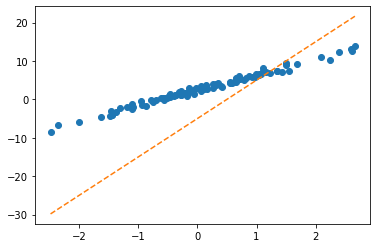

In [134]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

In [135]:
for epoc in range(30): 
    yhat = net(x)
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

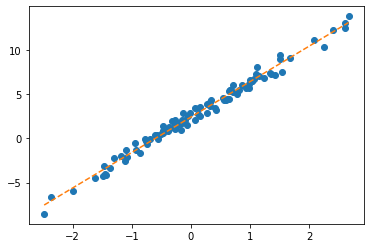

In [136]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

### ver2: net = torch.nn.Linear(2,1,bias=False)

`-` 바로 반복하겠습니다..

In [137]:
net = torch.nn.Linear(2,1,bias=False) 
net.weight.data = torch.tensor([[-5.0, 10.0]])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

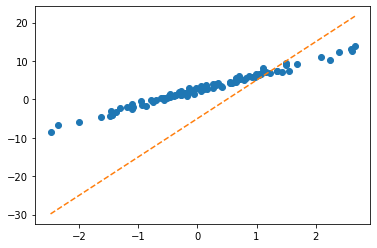

In [138]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

In [139]:
for epoc in range(30): 
    yhat = net(X)
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

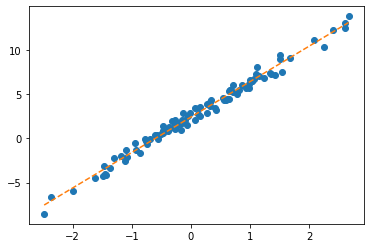

In [140]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

------------------------------------------------------------------------

## Appendix: `net.parameters()`의 의미? (선택학습)

`-` iterator, generator의 개념필요 -
https://guebin.github.io/IP2022/2022/06/06/(14주차)-6월6일.html,
클래스공부 8단계 참고

`-` 탐구시작: 네트워크 생성

In [141]:
net = torch.nn.Linear(in_features=1,out_features=1)
net.weight

Parameter containing:
tensor([[-0.4277]], requires_grad=True)

In [142]:
net.bias

Parameter containing:
tensor([-0.0629], requires_grad=True)

`-` torch.optim.SGD? 를 확인하면 params에 대한설명에 아래와 같이
되어있음

    params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups

`-` 설명을 읽어보면 params에 iterable object를 넣으라고 되어있음
(iterable object는 숨겨진 명령어로 `__iter__`를 가지고 있는 오브젝트를
의미)

In [143]:
set(dir(net.parameters)) & {'__iter__'}

set()

In [144]:
set(dir(net.parameters())) & {'__iter__'}

{'__iter__'}

`-` 무슨의미?

In [145]:
_generator = net.parameters()

In [146]:
_generator.__next__()

Parameter containing:
tensor([[-0.4277]], requires_grad=True)

In [147]:
_generator.__next__()

Parameter containing:
tensor([-0.0629], requires_grad=True)

In [148]:
_generator.__next__()

`-` 이건 이런느낌인데?

In [149]:
_generator2 = iter([net.weight,net.bias])

In [150]:
_generator2

In [151]:
_generator2.__next__()

Parameter containing:
tensor([[-0.4277]], requires_grad=True)

In [152]:
_generator2.__next__()

Parameter containing:
tensor([-0.0629], requires_grad=True)

In [153]:
_generator2.__next__()

`-` 즉 아래는 같은코드이다.

``` python
### 코드1
_generator = net.parameters() 
torch.optim.SGD(_generator,lr=1/10) 
### 코드2
_generator = iter([net.weight,net.bias])
torch.optim.SGD(_generator,lr=1/10) 
### 코드3 (이렇게 써도 코드2가 실행된다고 이해할 수 있음)
_iterator = [net.weight,net.bias]
torch.optim.SGD(_iterator,lr=1/10) 
```

결론: `net.parameters()`는 net오브젝트에서 학습할 파라메터를 모두 모아
리스트(iterable object)로 만드는 함수라 이해할 수 있다.

`-` 응용예제1

In [154]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
optimizr = torch.optim.SGD([What],lr=1/10) 

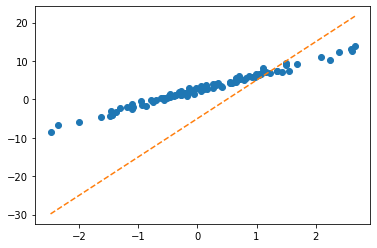

In [155]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

In [156]:
for epoc in range(30):
    yhat = X@What 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step();optimizr.zero_grad() 

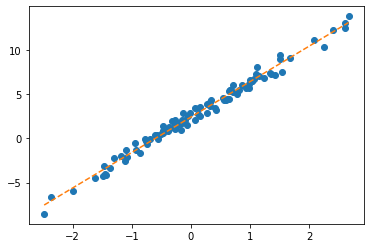

In [157]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

`-` 응용예제2

In [158]:
b = torch.tensor(-5.0,requires_grad=True)
w = torch.tensor(10.0,requires_grad=True)
optimizr = torch.optim.SGD([b,w],lr=1/10)

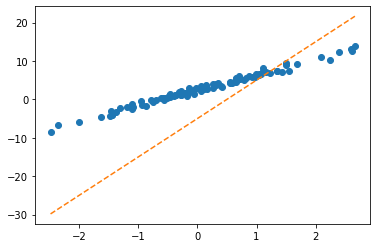

In [159]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

In [160]:
for epoc in range(30):
    yhat = b+ w*x 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step(); optimizr.zero_grad()

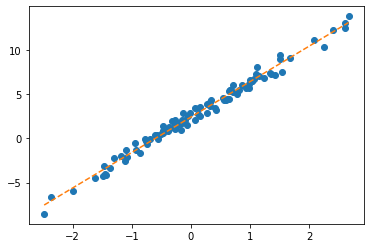

In [161]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

## Logistic regression

### motive

`-` 현실에서 이런 경우가 많음 - $x$가 커질수록 (혹은 작아질수록)
성공확률이 증가함.

`-` (X,y)는 어떤모양?

In [162]:
_df = pd.DataFrame({'x':range(-6,7),'y':[0,0,0,0,0,0,1,0,1,1,1,1,1]})
_df 

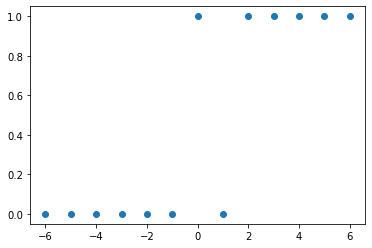

In [163]:
plt.plot(_df.x,_df.y,'o')

`-` (예비학습) 시그모이드라는 함수가 있음

In [164]:
xx = torch.linspace(-6,6,100)
def f(x):
    return torch.exp(x)/(1+torch.exp(x))

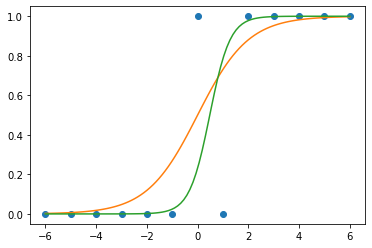

In [165]:
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(xx))
plt.plot(xx,f(2.5*xx-1.2)) # 영향을 크게 받을 때 + 운적인 요소 영향 받을 때(절편) -> 모델링하는 과정

베르누이 특정 확률로 0 또는 1 뽑기

### model

`-` $x$가 커질수록 $y=1$이 잘나오는 모형은 아래와 같이 설계할 수 있음
\<— 외우세요!!!

-   $y_i \sim Ber(\pi_i),\quad$ where
    $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

-   $\hat{y}_i= \hat{pi}_\frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$

-   $loss= - \sum_{i=1}^{n} \big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$
    \<— 외우세요!!

$y_i=1$ $\hat{y_i} = 1$loss가 0 근처 $\hat{y_i} = 0$ loss가- 무한대

$y_i = 0$ $\hat{y_i} = 0$loss가 0근처 $\hat{y_i} = 1$ loss가 1

### toy example

`-` 예제시작

In [166]:
torch.bernoulli?

Docstring: 
bernoulli(input, *, generator=None, out=None) -> Tensor
Draws binary random numbers (0 or 1) from a Bernoulli distribution.
The :attr:`input` tensor should be a tensor containing probabilities
to be used for drawing the binary random number.
Hence, all values in :attr:`input` have to be in the range:
:math:`0 \leq \text{input}_i \leq 1`.
The :math:`\text{i}^{th}` element of the output tensor will draw a
value :math:`1` according to the :math:`\text{i}^{th}` probability value given
in :attr:`input`.
.. math::
 \text{out}_{i} \sim \mathrm{Bernoulli}(p = \text{input}_{i})
The returned :attr:`out` tensor only has values 0 or 1 and is of the same
shape as :attr:`input`.
:attr:`out` can have integral ``dtype``, but :attr:`input` must have floating
point ``dtype``.
Args:
 input (Tensor): the input tensor of probability values for the Bernoulli distribution
Keyword args:
 generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
 out (Tensor, optional): the output tensor.
Example::
 >>> a = torch.empty(3, 3).uniform_(0, 1) # generate a uniform random matrix with range [0, 1]
 >>> a
 tensor([[ 0.1737, 0.0950, 0.3609],
 [ 0.7148, 0.0289, 0.2676],
 [ 0.9456, 0.8937, 0.7202]])
 >>> torch.bernoulli(a)
 tensor([[ 1., 0., 0.],
 [ 0., 0., 0.],
 [ 1., 1., 1.]])
 >>> a = torch.ones(3, 3) # probability of drawing "1" is 1
 >>> torch.bernoulli(a)
 tensor([[ 1., 1., 1.],
 [ 1., 1., 1.],
 [ 1., 1., 1.]])
 >>> a = torch.zeros(3, 3) # probability of drawing "1" is 0
 >>> torch.bernoulli(a)
 tensor([[ 0., 0., 0.],
 [ 0., 0., 0.],
 [ 0., 0., 0.]])
 Type: builtin_function_or_method

In [167]:
torch.bernoulli(torch.tensor([0.5]*100)) # 0.5의 확률ㄹ 0 또는 1 뽑아

tensor([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 1.])

In [168]:
x=torch.linspace(-1,1,2000).reshape(2000,1)
w0= -1 
w1= 5 
u = w0+x*w1 
v = torch.exp(u)/(1+torch.exp(u)) # v=πi, 즉 확률을 의미함
y = torch.bernoulli(v) 

In [173]:
v

tensor([[0.0025],
        [0.0025],
        [0.0025],
        ...,
        [0.9818],
        [0.9819],
        [0.9820]])

In [174]:
u

tensor([[-6.0000],
        [-5.9950],
        [-5.9900],
        ...,
        [ 3.9900],
        [ 3.9950],
        [ 4.0000]])

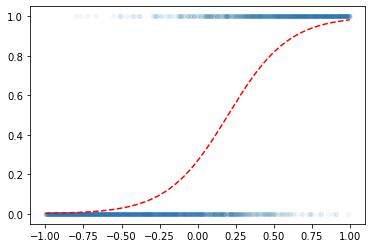

In [175]:
#plt.scatter(x,y,alpha=0.05)
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--r')

-   우리의 목적: $x$가 들어가면 빨간선 $\hat{y}$의 값을 만들어주는
    mapping을 학습해보자.

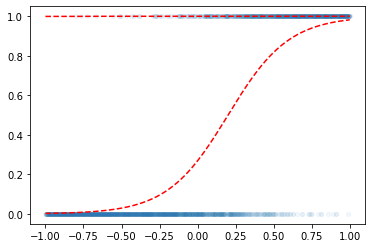

In [176]:
w0hat = 10
w1hat = 3
yhat = f(w0hat + w1hat*x)
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--r')
plt.plot(x,yhat,'--r')

In [177]:
l1 = torch.nn.Linear(1,1)

In [178]:
l1.bias.data = torch.tensor([-1.0])
l1.weight.data = torch.tensor([[1.0]])

In [179]:
a1 = torch.nn.Sigmoid()

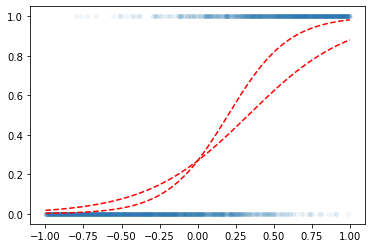

In [180]:
w0hat = -1
w1hat = 3
yhat = a1(w0hat + w1hat*x)
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--r')
plt.plot(x,yhat,'--r')

In [181]:
for epoc in range(6000):
    ## step1 
    yhat = a1(l1(x))
    ## step2 
    loss = torch.mean((y-yhat)**2) ## loss 를 원래 이렇게 하는건 아니에요.. 
    ## step3 
    loss.backward()
    ## step4 
    l1.bias.data = l1.bias.data - 0.1 * l1.bias.grad 
    l1.weight.data = l1.weight.data - 0.1 * l1.weight.grad 
    l1.bias.grad = None 
    l1.weight.grad = None 

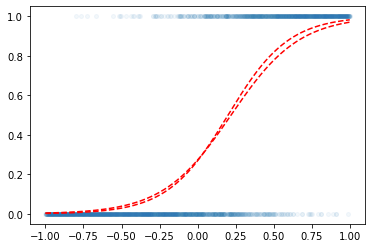

In [182]:
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--r')
plt.plot(x,a1(l1(x)).data,'--r')

------------------------------------------------------------------------

## 숙제